## Project Description
This project is aimed to use the dataset of the project named as "A Wearable Exam Stress Dataset for Predicting Cognitive Performance in Real-World Settings" from Physionet to find out **how people's skin conductance fluctuates in reality when they undergo a stressful experience**.

### Task
1. **Data Preprocessing**: 
    - Load the dataset and preprocess the data.
    - Extract the skin conductance data from the dataset.
    - Visualize the skin conductance data.
2. **Feature Engineering**:
    - Extract features from the skin conductance data.
    - Visualize the features.
    - Analyze the features.
    - Compare the features with the ground truth.
3. **Modeling**:  
    - Train a model to predict the ground truth from the features.
    - Evaluate the model.
    - Visualize the prediction results.
4. **Evaluation**:
    - Analyze the prediction results.
    - Compare the results of each model.
    - Compare the prediction results with the ground truth.
5. **Conclusion**:
    - Summarize the findings.
    - Summarize the limitations.

### Goal
The goal of this project includes:
- Find out if there is relation between human body parameters and exam scores.
- If have, then find out which one or more  parameters are the most important.
- Try to describe the stress level of the students during the exam by using the human body parameters.
- Based on the facts that human body parameters will reflect the stress level, try to predict the exam scores.

### Data Description
The whole dataset is in the directory "./a-wearable-exam-stress-dataset-for-predicting-cognitive-performance-in-real-world-settings-1.0.0/Data"

The dataset contains the following files:
- `StudentGrades.txt`: The scores of each exam of each student.
- `README.md`: The description of the dataset.
- `S1 - S10`: Each file contains the data of a subject, inlcuding Final exam, Midterm exam 1 and 2. 10 subjects in total (gender is not important).

Data description of each exam:
- `ACC`: Data from 3-axis accelerometer sensor. The accelerometer is configured to measure acceleration in the range [-2g, 2g]. Therefore the unit in this file is 1/64g.
Data from x, y, and z axis are respectively in first, second, and third column.
- `BVP`: Data from Blood Volume Pulse sensor. 
- `EDA`: Data from Electrodermal Activity sensor. 
- `HR`: Data from Heart Rate sensor.
- `TEMP`: Data from Temperature sensor.

### Memo
We do not know the difficulty distribution of the exam

The subject of the exam is also unknown, math is difficult while some other subjects are easy

Some other factors will still affect the scores: e.g. study hard or not, sleep well before the test or not, mood good or not etc.

The dataset has been used in a publication to predict exam grades from electrodermal activity

Temperature is collected outside the body, maybe not very useful

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# try to read HR data
os.getcwd()
os.chdir('/Users/tongluyangyu/Documents/GitHub/Final-project-of-introduction-to-machine-learning/a-wearable-exam-stress-dataset-for-predicting-cognitive-performance-in-real-world-settings-1.0.0/Data')
os.getcwd()
test_filename = 'S1/Final/HR.csv'

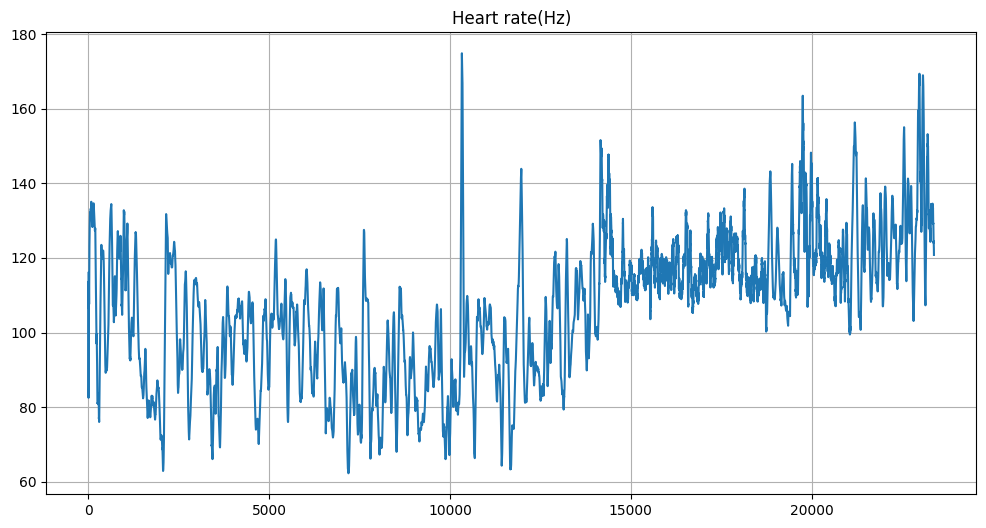

In [20]:
test_data = pd.read_csv(test_filename, skiprows=1)
test_data.columns = ['Heart rate(Hz)']
test_data.head()
# plot the data
plt.figure(figsize=(12, 6))
plt.plot(test_data['Heart rate(Hz)'])
plt.title('Heart rate(Hz)')
plt.grid(True)
plt.show()

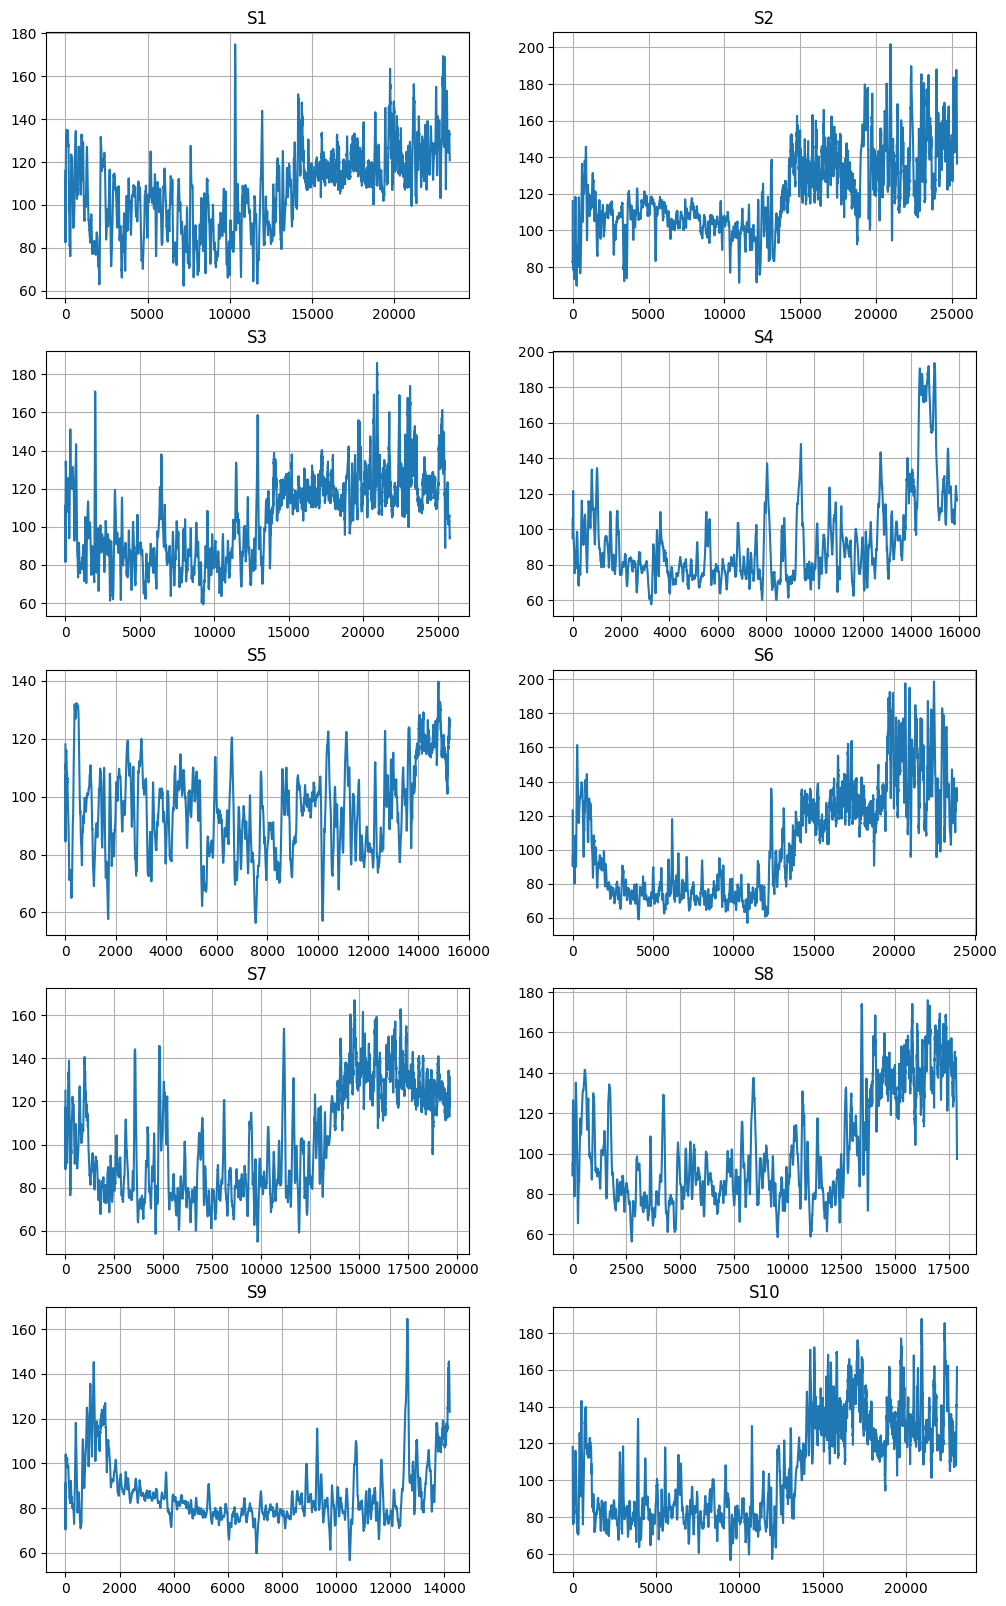

In [28]:
fig, ax = plt.subplots(5, 2, figsize=(12, 20))

# read HR data of Final exam from all subjects 
for i in range(10):
    filename = 'S' + str(i+1) + '/Final/HR.csv'
    data = pd.read_csv(filename, skiprows=1)
    data.columns = ['Heart rate(Hz)']
    ax[i//2, i%2].plot(data['Heart rate(Hz)'])
    ax[i//2, i%2].set_title('S' + str(i+1))
    ax[i//2, i%2].grid(True)

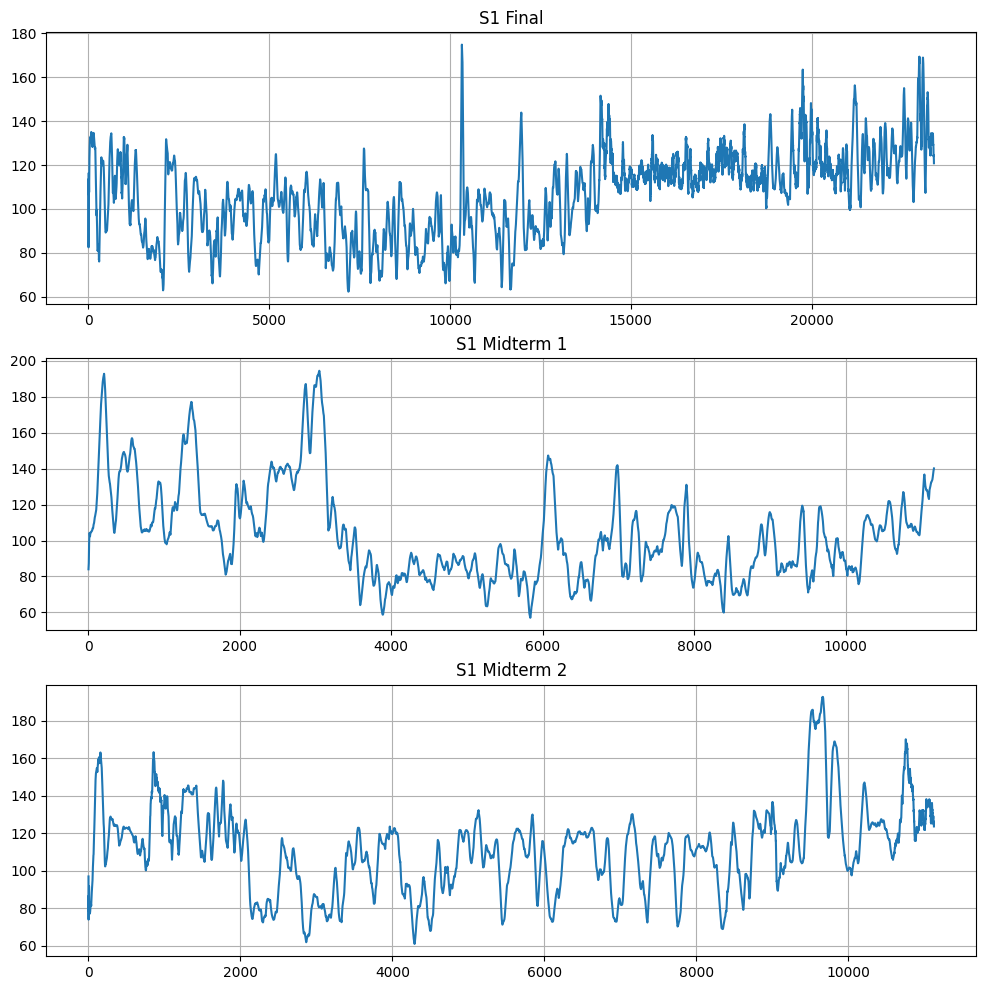

In [29]:
# Read HR data of all exams from one subject
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
for i in range(3):
    if i == 0:
        filename = 'S1/Final/HR.csv'
        data = pd.read_csv(filename, skiprows=1)
        data.columns = ['Heart rate(Hz)']
        ax[i].plot(data['Heart rate(Hz)'])
        ax[i].set_title('S1 Final')
        ax[i].grid(True)
    elif i == 1:
        filename = 'S1/Midterm 1/HR.csv'
        data = pd.read_csv(filename, skiprows=1)
        data.columns = ['Heart rate(Hz)']
        ax[i].plot(data['Heart rate(Hz)'])
        ax[i].set_title('S1 Midterm 1')
        ax[i].grid(True)
    else:
        filename = 'S1/Midterm 2/HR.csv'
        data = pd.read_csv(filename, skiprows=1)
        data.columns = ['Heart rate(Hz)']
        ax[i].plot(data['Heart rate(Hz)'])
        ax[i].set_title('S1 Midterm 2')
        ax[i].grid(True)

In [38]:
# Read key data from one final exam of S1
files = ['BVP.csv', 'EDA.csv', 'HR.csv']
data = pd.DataFrame()

for file in files:
    filename = f'S1/Final/{file}'
    temp_data = pd.read_csv(filename, skiprows=1)
    data[file.split('.')[0]] = temp_data.iloc[:, 0]

data.head()

,BVP,EDA,HR
0,-0.0,0.000000,116.00
1,-0.0,0.005125,82.50
2,-0.0,0.020501,96.33
3,-0.0,0.021783,86.25
4,-0.0,0.023064,98.60


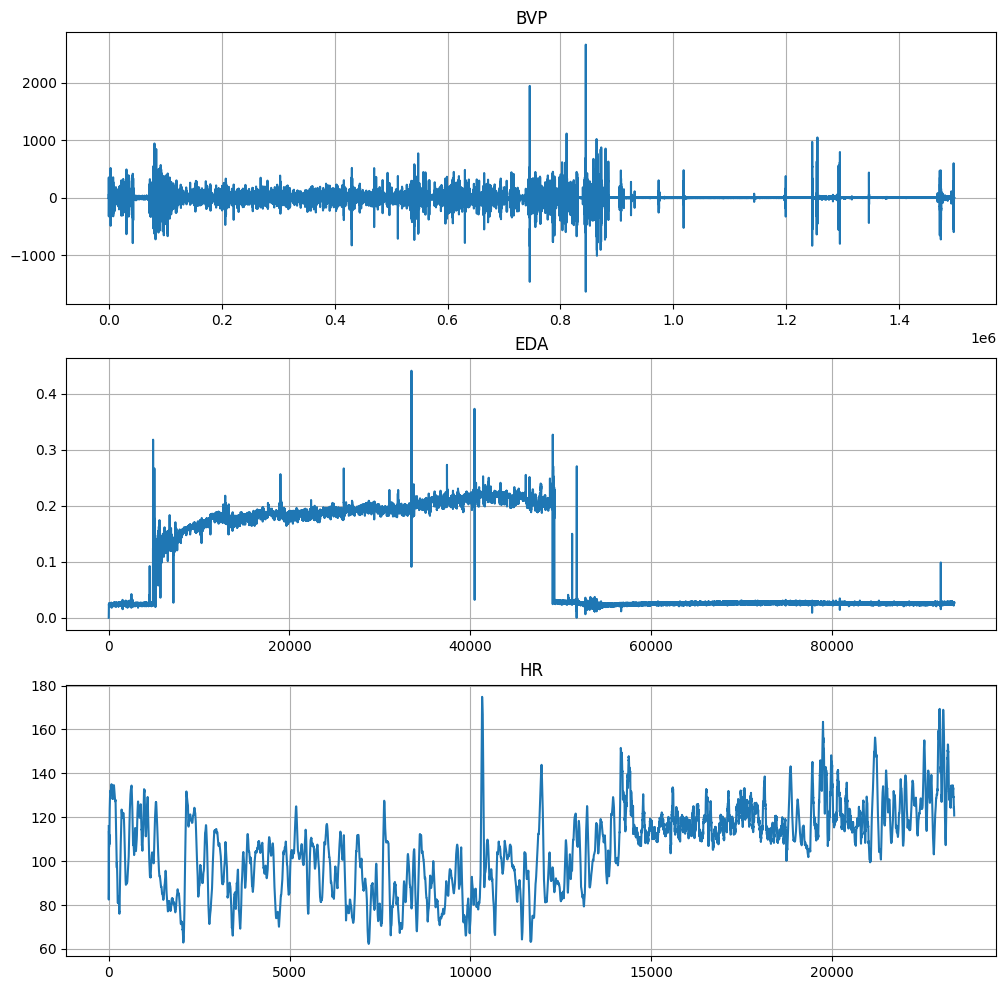

In [39]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
for i in range(3):
    ax[i].plot(data[files[i].split('.')[0]])
    ax[i].set_title(files[i].split('.')[0])
    ax[i].grid(True)